https://www.comunidadedatascience.com/como-usar-data-science-para-fazer-a-empresa-vender-mais/

# 0. IMPORTS

In [70]:
import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt
import seaborn as sns

## 0.0. Helper Functions

## 0.1. Loading Data

- id = Unique ID for the customer
- Gender = Gender of the customer
- Age = Age of the customer
- Driving_License = 0: Customer does not have DL; 1: Customer already has DL
- Region_Code = Unique code for the region of the customer
- Previously_Insured = 1: Customer already has Vehicle Insurance; 0: Customer doesn't have Vehicle Insurance
- Vehicle_Age = Age of the Vehicle
- Vehicle_Damage = 1: Customer got his/her vehicle damaged in the past; 0: Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium = The amount customer needs to pay as premium in the year
- PolicySalesChannel = Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage = Number of Days, Customer has been associated with the company
- Response = 1: Customer is interested; 0: Customer is not interested

In [21]:
# Credentials SQL
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
pwd = 'cdspa'

In [22]:
query = """
        select * from pa004.insurance i inner join pa004.users u on i.id = u.id 
                                  inner join pa004.vehicle v on v.id = u.id order by i.id ASC
"""

In [24]:
string_connect = 'postgresql://' + username + ':' + pwd + '@' + host + ':' + str(port) + '/' + database
engine = sa.create_engine(string_connect)
conn1 = engine.connect()
df_raw = pd.read_sql(query, conn1)

In [25]:
df_raw = df_raw.drop(df.columns[[5,10]], axis=1)

In [31]:
df_raw

,previously_insured,annual_premium,vintage,response,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage
0,0,40454.0,217,1,Male,44,28.0,26.0,1,> 2 Years,Yes
1,0,33536.0,183,0,Male,76,3.0,26.0,1,1-2 Year,No
2,0,38294.0,27,1,Male,47,28.0,26.0,1,> 2 Years,Yes
3,1,28619.0,203,0,Male,21,11.0,152.0,1,< 1 Year,No
4,1,27496.0,39,0,Female,29,41.0,152.0,1,< 1 Year,No
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,30170.0,88,0,Male,74,26.0,26.0,1,1-2 Year,No
381105,1,40016.0,131,0,Male,30,37.0,152.0,1,< 1 Year,No
381106,1,35118.0,161,0,Male,21,30.0,160.0,1,< 1 Year,No
381107,0,44617.0,74,0,Female,68,14.0,124.0,1,> 2 Years,Yes


# 1. DATA DESCRIPTION

In [52]:
df1 = df_raw.copy()

## 1.0. Rename Columns

In [53]:
df1.columns

Index(['previously_insured', 'annual_premium', 'vintage', 'response', 'gender',
       'age', 'region_code', 'policy_sales_channel', 'driving_license',
       'vehicle_age', 'vehicle_damage'],
      dtype='object')

## 1.1. Data Dimensions

In [54]:
print ('Number of Rows: {}'.format(df1.shape[0]))
print ('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 381109
Number of Columns: 11


## 1.2. Data Types

In [55]:
df1.dtypes

previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
dtype: object

## 1.3. Check NA

In [56]:
df1.isna().sum()

previously_insured      0
annual_premium          0
vintage                 0
response                0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
dtype: int64

## 1.4. Fill out NA

There is no NA in the dataset

## 1.5. Change Types

In [63]:
df1['previously_insured'].value_counts()

0    206481
1    174628
Name: previously_insured, dtype: int64

In [64]:
df1['driving_license'].value_counts()

1    380297
0       812
Name: driving_license, dtype: int64

In [57]:
df1['vehicle_damage'].value_counts()

Yes    192413
No     188696
Name: vehicle_damage, dtype: int64

In [58]:
df1['vehicle_damage'] = df1['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

In [59]:
df1['region_code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: region_code, dtype: int64

In [60]:
df1['region_code'] = df1['region_code'].astype('int64')
df1['vehicle_damage'] = df1['vehicle_damage'].astype('int64')

In [61]:
df1.dtypes

previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
gender                   object
age                       int64
region_code               int64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage            int64
dtype: object

## 1.6. Descriptive statistics

In [62]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
previously_insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
annual_premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0
age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
region_code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
policy_sales_channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
driving_license,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
vehicle_damage,381109.0,0.504877,0.499977,0.0,0.0,1.0,1.0,1.0


In [77]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.6.0. Numerical Attributes

In [66]:
# Central Tentency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T


# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concat
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,0.167747,-1.971871
1,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087,34.004569
2,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,0.003030,-1.200688
3,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906,3.298788
4,age,20.0,85.0,65.0,38.822584,36.0,15.511591,0.672539,-0.565655
5,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-0.115266,-0.867857
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-0.900008,-0.970810
7,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-21.595182,464.354302
8,vehicle_damage,0.0,1.0,1.0,0.504877,1.0,0.499976,-0.019507,-1.999630


C:\Users\gabriellima\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


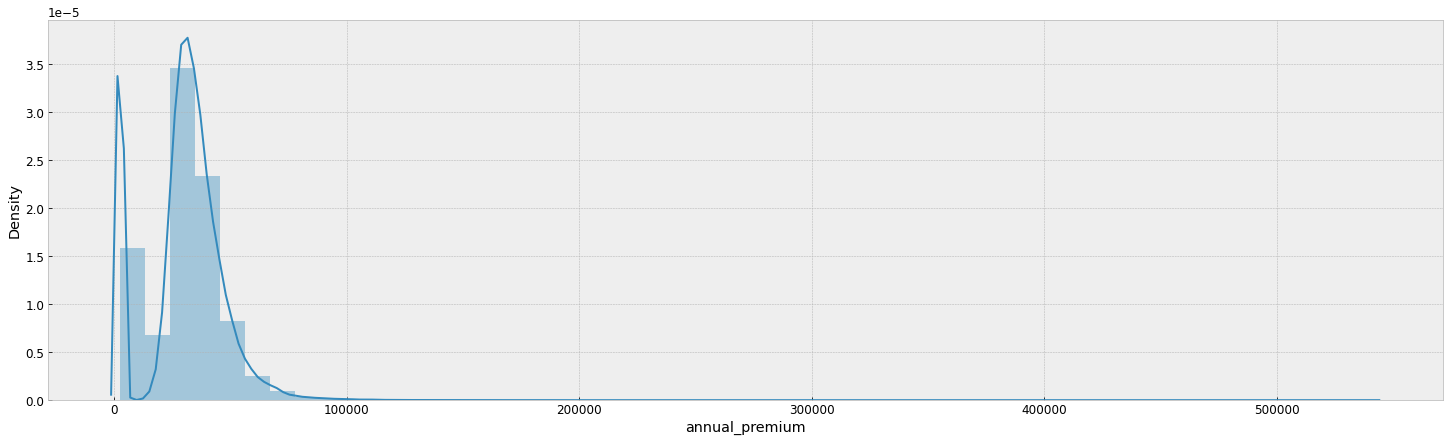

In [76]:
plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25, 7]
plt.rcParams['font.size'] = 12

sns.distplot(df1['annual_premium']);

### 1.6.1. Categorical Attributes

In [79]:
cat_attributes.apply(lambda x: x.unique().shape[0])

gender         2
vehicle_age    3
dtype: int64

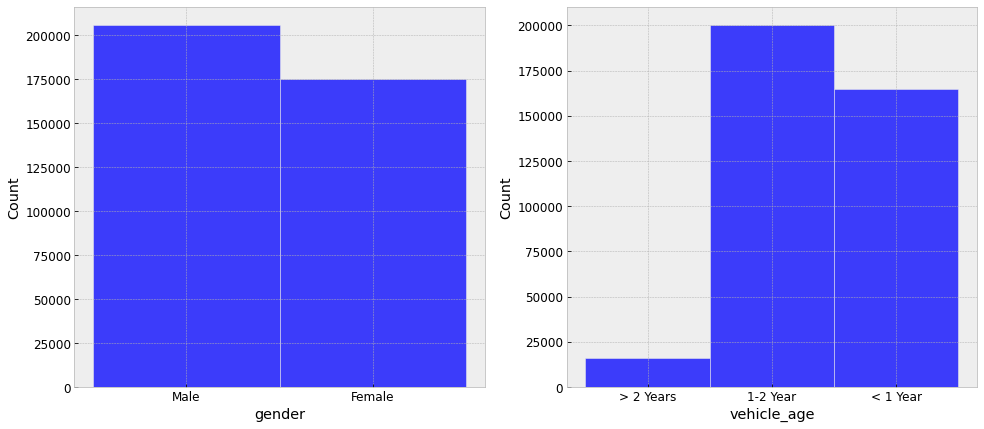

In [87]:
plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25, 7]
plt.rcParams['font.size'] = 12

plt.subplot(1, 3, 1)
sns.histplot(x='gender', data=df1);

plt.subplot(1, 3, 2)
sns.histplot(x='vehicle_age', data=df1);

# 2. FEATURE ENGINEERING

In [88]:
df2 = df1.copy()